In [2]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from scipy import stats

from sklearn.preprocessing import StandardScaler

import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

C:\Users\Tusharika Joshi\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/Premalatha-success/edForce/main/TaxiFare.csv')

In [4]:
data.head()

unique_id  amount      date_time_of_pickup  longitude_of_pickup  \
0   26:21.0     4.5  2009-06-15 17:26:21 UTC           -73.844311   
1   52:16.0    16.9  2010-01-05 16:52:16 UTC           -74.016048   
2   35:00.0     5.7  2011-08-18 00:35:00 UTC           -73.982738   
3   30:42.0     7.7  2012-04-21 04:30:42 UTC           -73.987130   
4   51:00.0     5.3  2010-03-09 07:51:00 UTC           -73.968095   

   latitude_of_pickup  longitude_of_dropoff  latitude_of_dropoff  \
0           40.721319            -73.841610            40.712278   
1           40.711303            -73.979268            40.782004   
2           40.761270            -73.991242            40.750562   
3           40.733143            -73.991567            40.758092   
4           40.768008            -73.956655            40.783762   

   no_of_passenger  
0                1  
1                1  
2                2  
3                1  
4                1

In [5]:
data.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [6]:
data.shape

(50000, 8)

In [7]:
data.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

<AxesSubplot:>

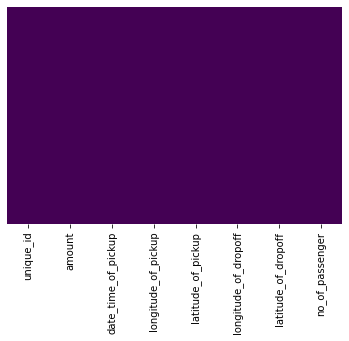

In [8]:
sn.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [9]:
data.describe(include='all')

unique_id        amount      date_time_of_pickup  longitude_of_pickup  \
count      50000  50000.000000                    50000         50000.000000   
unique      3597           NaN                    49555                  NaN   
top      26:00.0           NaN  2011-09-03 01:30:00 UTC                  NaN   
freq         457           NaN                        3                  NaN   
mean         NaN     11.364171                      NaN           -72.509756   
std          NaN      9.685557                      NaN            10.393860   
min          NaN     -5.000000                      NaN           -75.423848   
25%          NaN      6.000000                      NaN           -73.992062   
50%          NaN      8.500000                      NaN           -73.981840   
75%          NaN     12.500000                      NaN           -73.967148   
max          NaN    200.000000                      NaN            40.783472   

        latitude_of_pickup  longitude_of_dropoff  latitude_of_dropoff  \
count         50000.000000          50000.000000         50000.000000   
unique                 NaN                   NaN                  NaN   
top                    NaN                   NaN                  NaN   
freq                   NaN                   NaN                  NaN   
mean             39.933759            -72.504616            39.926251   
std               6.224857             10.407570             6.014737   
min             -74.006893            -84.654241           -74.006377   
25%              40.734880            -73.991152            40.734372   
50%              40.752678            -73.980082            40.753372   
75%              40.767360            -73.963584            40.768167   
max             401.083332             40.851027            43.415190   

        no_of_passenger  
count      50000.000000  
unique              NaN  
top                 NaN  
freq                NaN  
mean           1.667840  
std            1.289195  
min            0.000000  
25%            1.000000  
50%            1.000000  
75%            2.000000  
max            6.000000

In [10]:
data.drop('unique_id', axis=1, inplace=True)

In [11]:
num_features=data.select_dtypes(include=['int', 'float'])
num_features.drop('amount', axis=1, inplace=True)

In [12]:
num_features.head()

longitude_of_pickup  latitude_of_pickup  longitude_of_dropoff  \
0           -73.844311           40.721319            -73.841610   
1           -74.016048           40.711303            -73.979268   
2           -73.982738           40.761270            -73.991242   
3           -73.987130           40.733143            -73.991567   
4           -73.968095           40.768008            -73.956655   

   latitude_of_dropoff  no_of_passenger  
0            40.712278                1  
1            40.782004                1  
2            40.750562                2  
3            40.758092                1  
4            40.783762                1

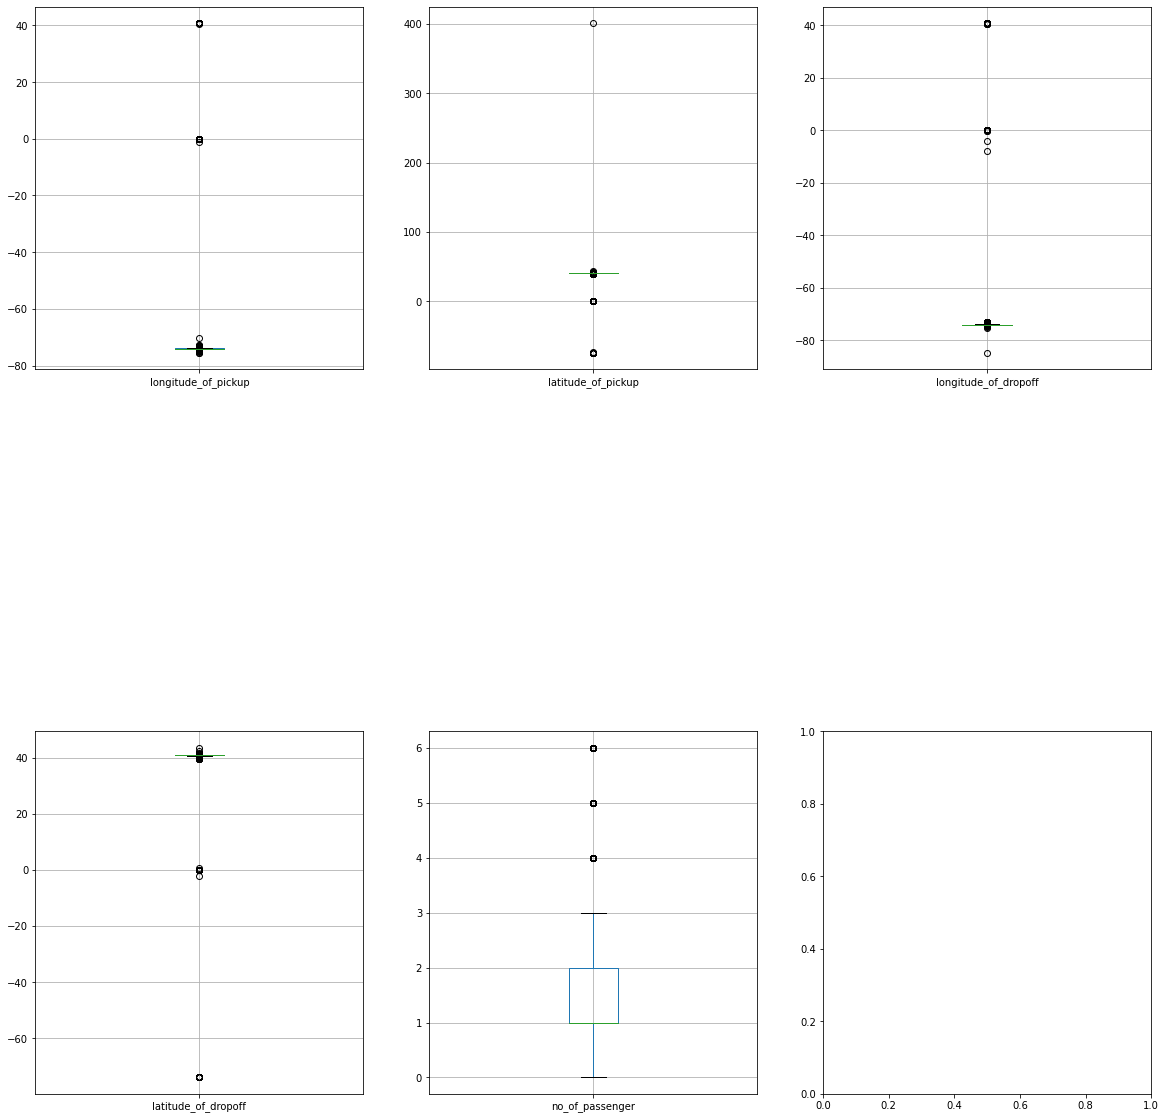

In [13]:
fig,axes = plt.subplots(2,3,figsize=(20,20))
for i, cols in enumerate(num_features):
    row, col= i//3, i%3
    num_features.boxplot(column=cols, ax=axes[row, col])
plt.subplots_adjust(hspace=1)

In [14]:
#function to remove outliers
def remove_outlier(col):
    q1= col.quantile(0.25)
    q3= col.quantile(0.75)
    iqr=q3-q1
    lower_lim=q1-1.5*iqr
    upper_lim=q3+1.5*iqr
    return lower_lim, upper_lim

In [15]:
for feat in num_features.columns:
    low, high=remove_outlier(num_features[feat])
    data=data[(data[feat]>=low) & (data[feat]<=high)]

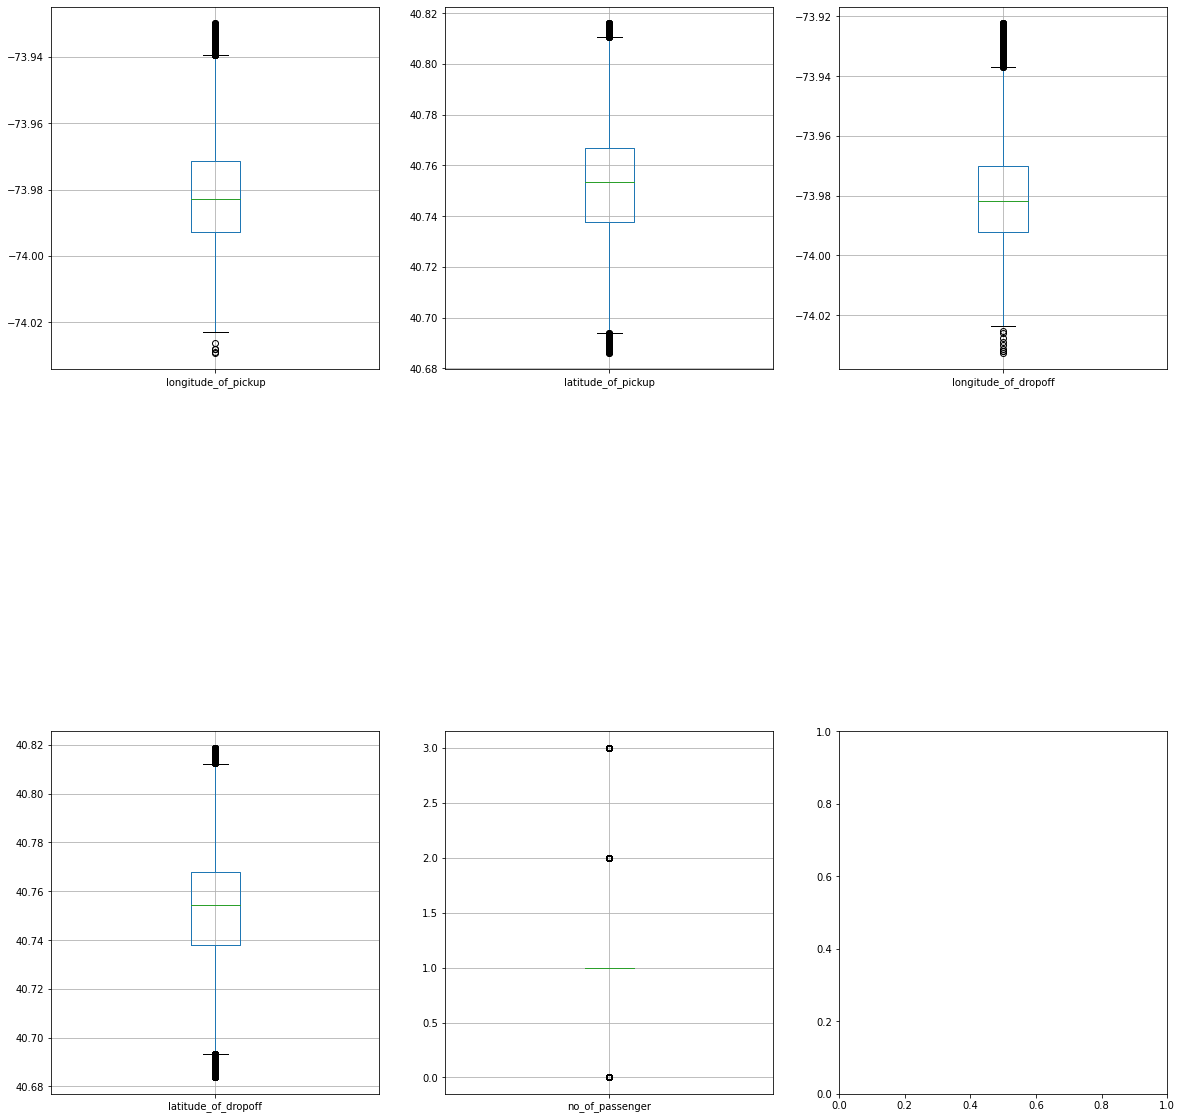

In [16]:
fig,axes = plt.subplots(2,3,figsize=(20,20))
for i, cols in enumerate(num_features):
    row, col= i//3, i%3
    data.boxplot(column=cols, ax=axes[row, col])
plt.subplots_adjust(hspace=1)

In [17]:
data['amount'][data['amount']<0] = 0.1
data[data['amount']<0]

Empty DataFrame
Columns: [amount, date_time_of_pickup, longitude_of_pickup, latitude_of_pickup, longitude_of_dropoff, latitude_of_dropoff, no_of_passenger]
Index: []

In [18]:
data['Date'] = pd.to_datetime(data['date_time_of_pickup']).dt.day
data['Hour'] = pd.to_datetime(data['date_time_of_pickup']).dt.hour
data['Week_day'] = pd.to_datetime(data['date_time_of_pickup']).dt.day_name()
data['Day'] = pd.to_datetime(data['date_time_of_pickup']).dt.dayofweek
data['Month'] = pd.to_datetime(data['date_time_of_pickup']).dt.month
data.drop('date_time_of_pickup', axis=1, inplace=True)

In [19]:
data.head()

amount  longitude_of_pickup  latitude_of_pickup  longitude_of_dropoff  \
1    16.9           -74.016048           40.711303            -73.979268   
2     5.7           -73.982738           40.761270            -73.991242   
3     7.7           -73.987130           40.733143            -73.991567   
4     5.3           -73.968095           40.768008            -73.956655   
5    12.1           -74.000964           40.731630            -73.972892   

   latitude_of_dropoff  no_of_passenger  Date  Hour  Week_day  Day  Month  
1            40.782004                1     5    16   Tuesday    1      1  
2            40.750562                2    18     0  Thursday    3      8  
3            40.758092                1    21     4  Saturday    5      4  
4            40.783762                1     9     7   Tuesday    1      3  
5            40.758233                1     6     9  Thursday    3      1

### Calculating distance using latitudes and longitudes

In [20]:
data["Distance"]=(((data["longitude_of_pickup"]-data["longitude_of_dropoff"])**2) + ((data["latitude_of_pickup"]-data["latitude_of_dropoff"])**2))**0.5
data['Distance'].head()

1    0.079696
2    0.013674
3    0.025340
4    0.019470
5    0.038675
Name: Distance, dtype: float64

## Data Visualization

<AxesSubplot:xlabel='amount', ylabel='Count'>

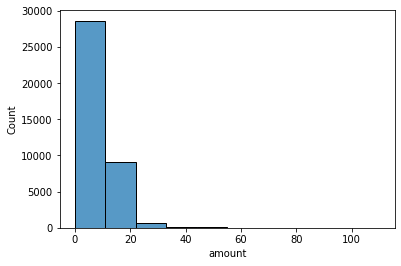

In [21]:
sn.histplot(x='amount', data=data, bins=10)

<AxesSubplot:xlabel='no_of_passenger', ylabel='Count'>

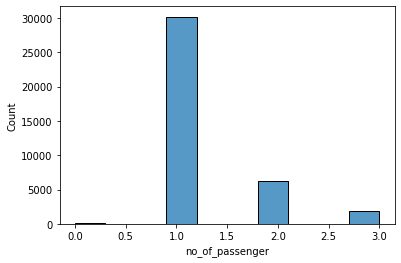

In [22]:
sn.histplot(x='no_of_passenger', data=data, bins=10)

<AxesSubplot:xlabel='latitude_of_pickup', ylabel='latitude_of_dropoff'>

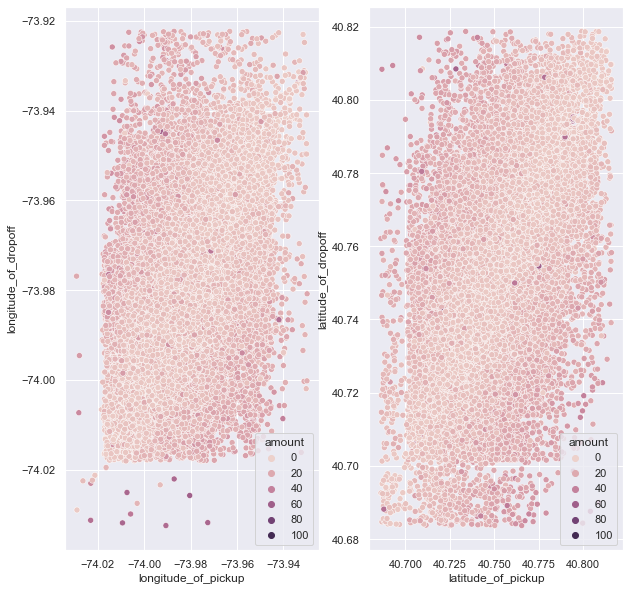

In [23]:
sn.set(rc={'figure.figsize':(10, 10)})
plt.subplot(121)
sn.scatterplot(x='longitude_of_pickup', y='longitude_of_dropoff', hue='amount', data=data)
plt.subplot(122)
sn.scatterplot(x='latitude_of_pickup', y='latitude_of_dropoff', hue='amount', data=data)

<AxesSubplot:xlabel='latitude_of_dropoff', ylabel='amount'>

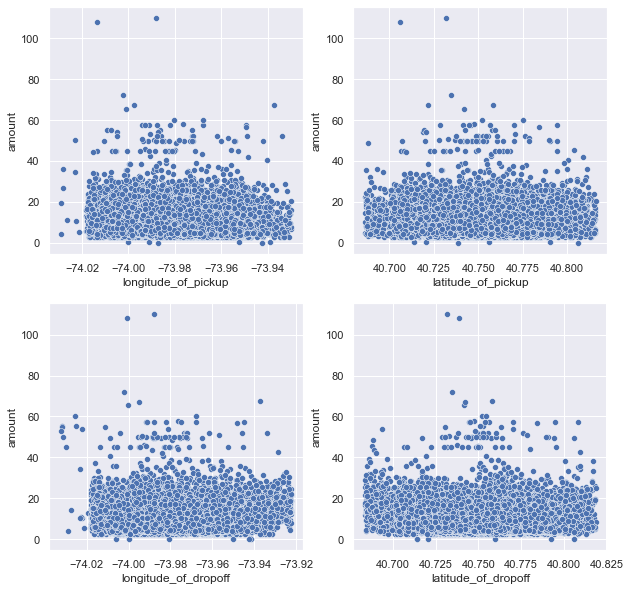

In [24]:
sn.set(rc={'figure.figsize':(10, 10)})
plt.subplot(221)
sn.scatterplot(x='longitude_of_pickup', y='amount', data=data)
plt.subplot(222)
sn.scatterplot(x='latitude_of_pickup', y='amount', data=data)
plt.subplot(223)
sn.scatterplot(x='longitude_of_dropoff', y='amount', data=data)
plt.subplot(224)
sn.scatterplot(x='latitude_of_dropoff', y='amount', data=data)

<AxesSubplot:xlabel='longitude_of_dropoff', ylabel='latitude_of_dropoff'>

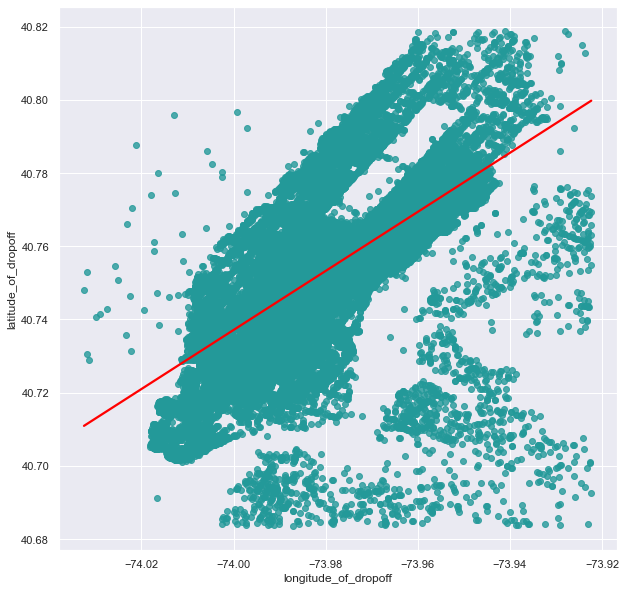

In [25]:
x=data['longitude_of_dropoff']
y=data['latitude_of_dropoff']
sn.regplot(x, y, ci=None, scatter_kws={"color": '#239999'}, line_kws={"color": "red"})

<AxesSubplot:xlabel='no_of_passenger', ylabel='amount'>

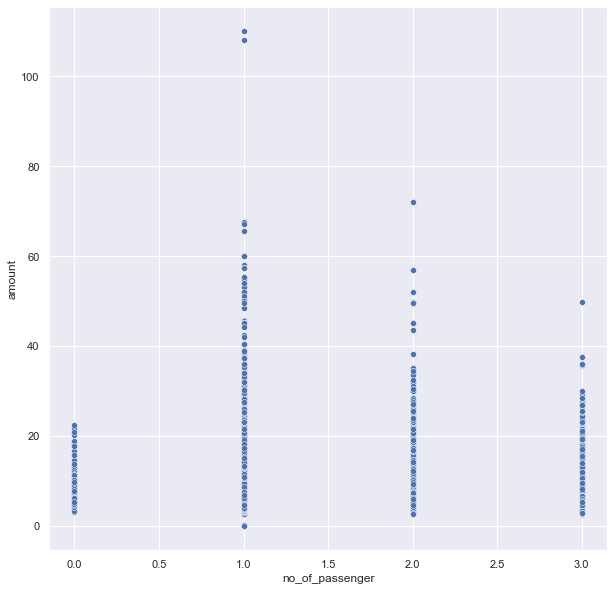

In [26]:
sn.scatterplot(x='no_of_passenger', y='amount', data=data)

<AxesSubplot:xlabel='Distance', ylabel='amount'>

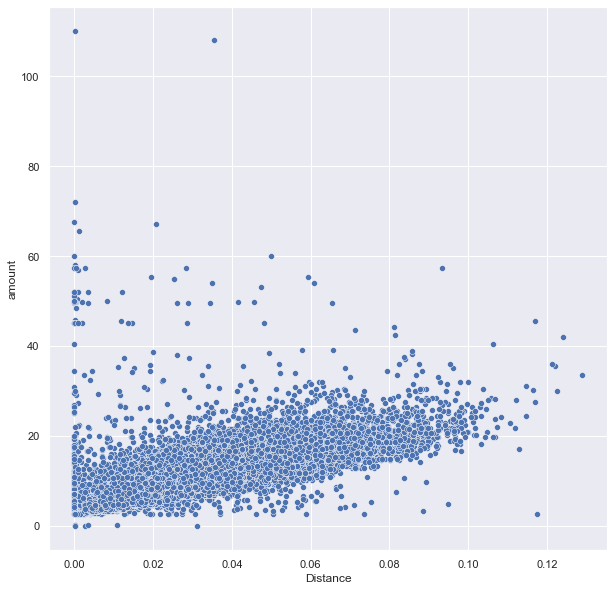

In [27]:
sn.scatterplot(x='Distance', y='amount', data=data)

<AxesSubplot:xlabel='Hour', ylabel='amount'>

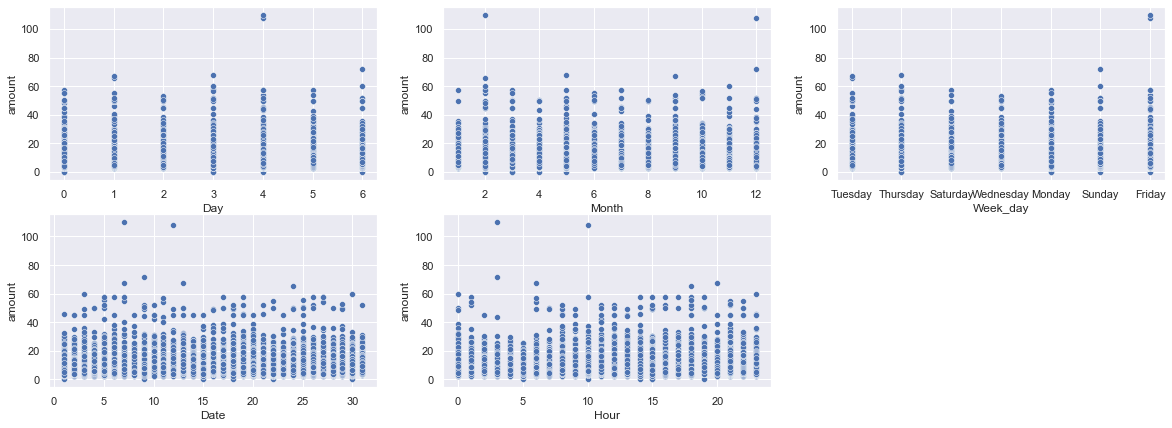

In [28]:
sn.set(rc={'figure.figsize':(20, 7)})
plt.subplot(231)
sn.scatterplot(x='Day', y='amount', data=data)
plt.subplot(232)
sn.scatterplot(x='Month', y='amount', data=data)
plt.subplot(233)
sn.scatterplot(x='Week_day', y='amount', data=data)
plt.subplot(234)
sn.scatterplot(x='Date', y='amount', data=data)
plt.subplot(235)
sn.scatterplot(x='Hour', y='amount', data=data)

<AxesSubplot:>

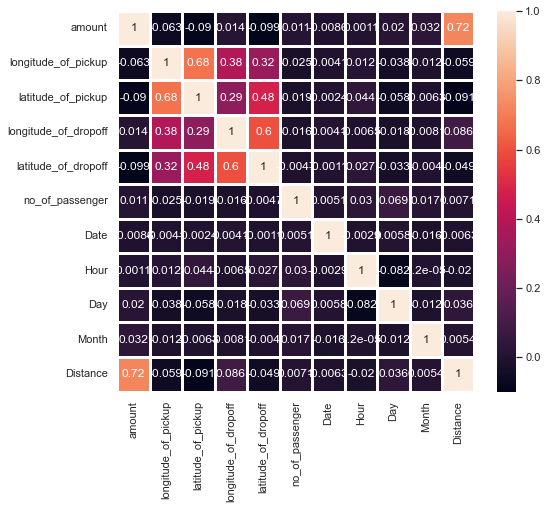

In [29]:
fig, ax= plt.subplots(figsize=(8, 7))
corr_matrix=data.corr()
sn.heatmap(corr_matrix, annot=True, linewidth=3, ax=ax)

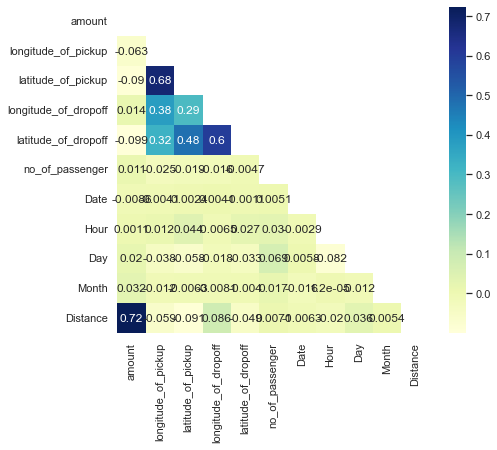

In [30]:
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sn.axes_style("white"):
    f, ax = plt.subplots(figsize=(7,6))
    ax = sn.heatmap(corr_matrix,mask=mask,annot=True,cmap="YlGnBu")

#### We can say from the heatmap that there is high correlation between amount and Distance fields

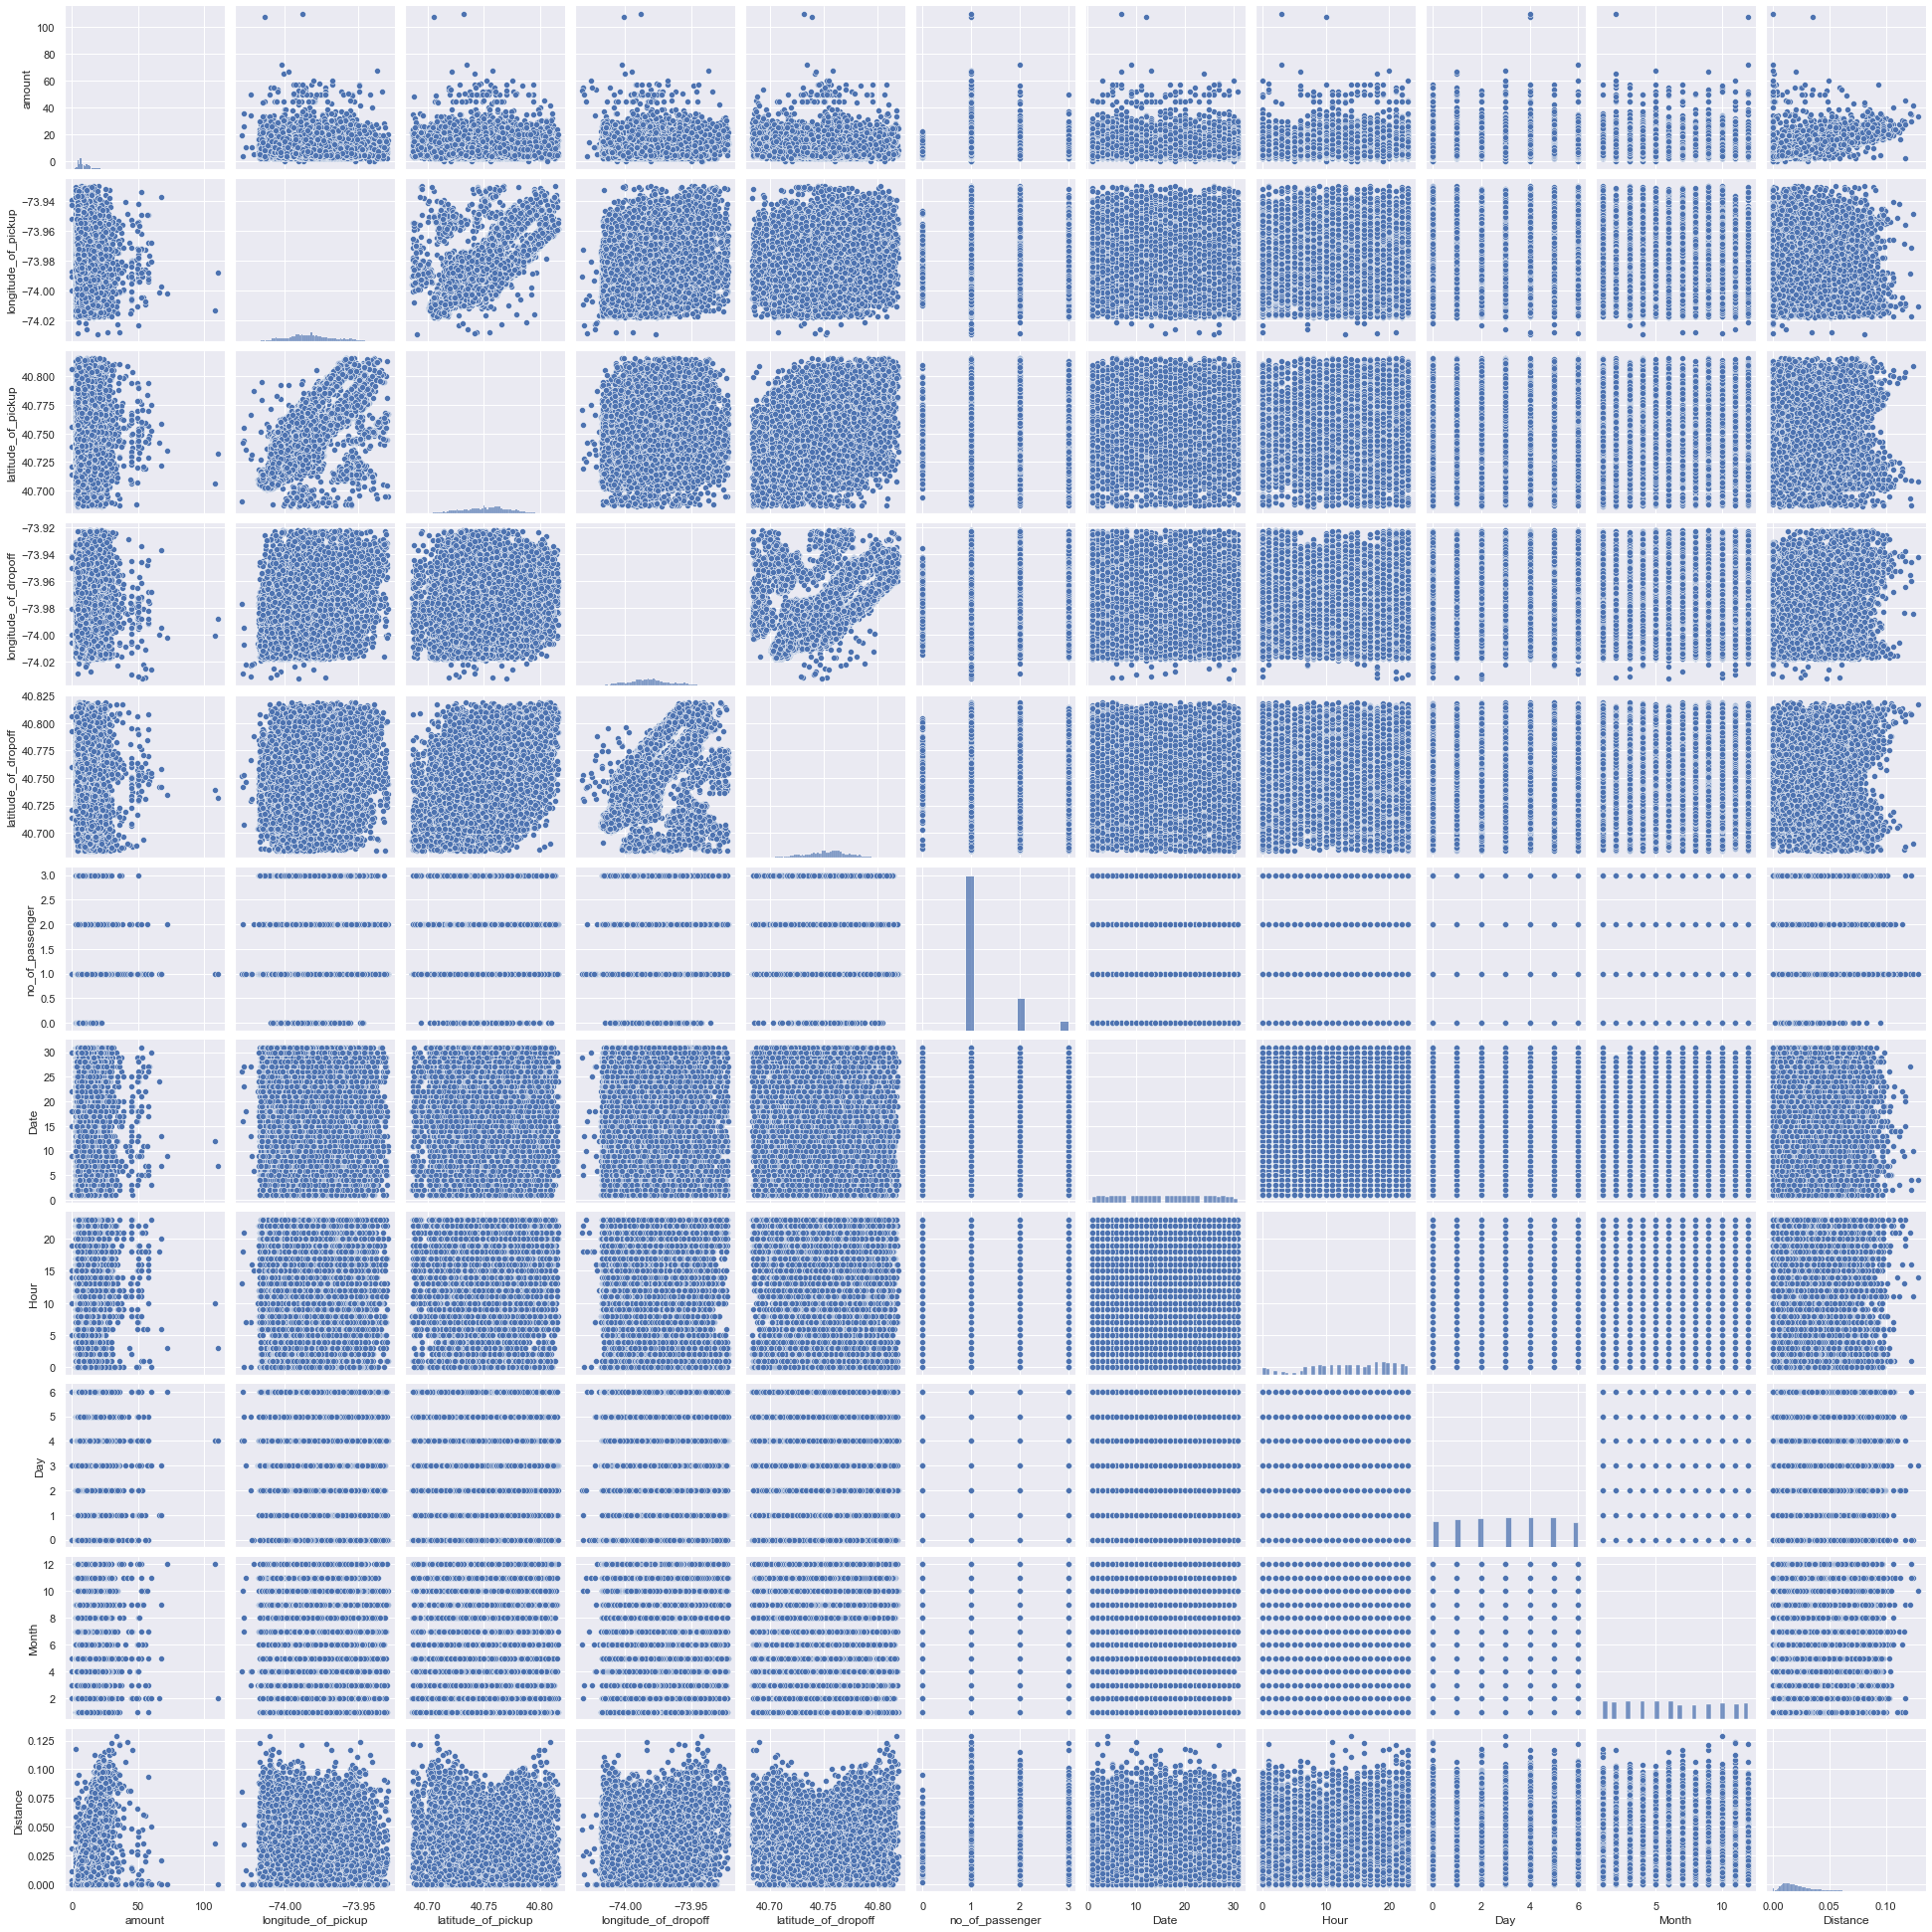

In [31]:
sn.pairplot(data)

In [32]:
data.drop('Week_day', axis=1, inplace=True)


## Data Normalizing

In [33]:
#function to plot a histogram and a Q-Q plot for a feature
def diagnostic_plots(data, feature):
    plt.figure(figsize=(15, 6))
    plt.subplot(121)
    data[feature].hist()
    plt.subplot(122)
    stats.probplot(data[feature], dist='norm', plot=plt)
    plt.show()

Plots without scaling for amount


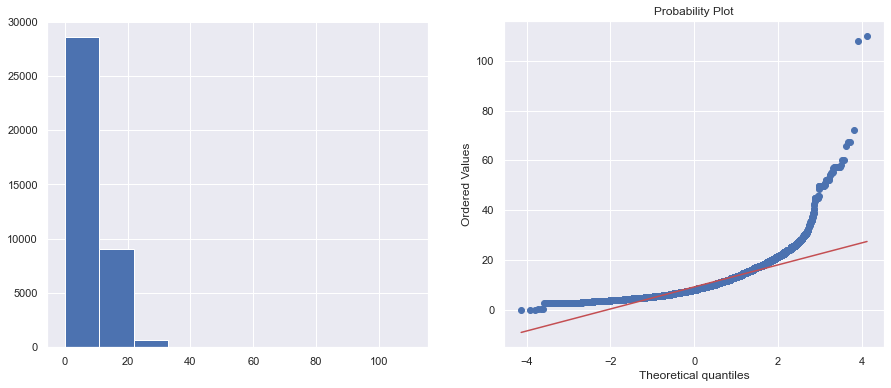

In [34]:
print("Plots without scaling for amount")
diagnostic_plots(data, 'amount')

Plots after log-scaling for amount


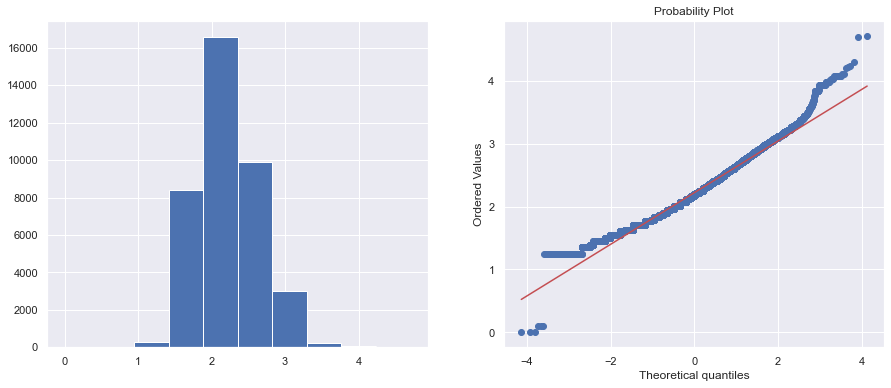

In [35]:
#logarithmic Transformation
print("Plots after log-scaling for amount")
data['log_amount']=np.log(data['amount']+1)
diagnostic_plots(data, 'log_amount')
data['amount']=data[['log_amount']]
data.drop('log_amount', axis=1, inplace=True)

Plots without scaling for  amount


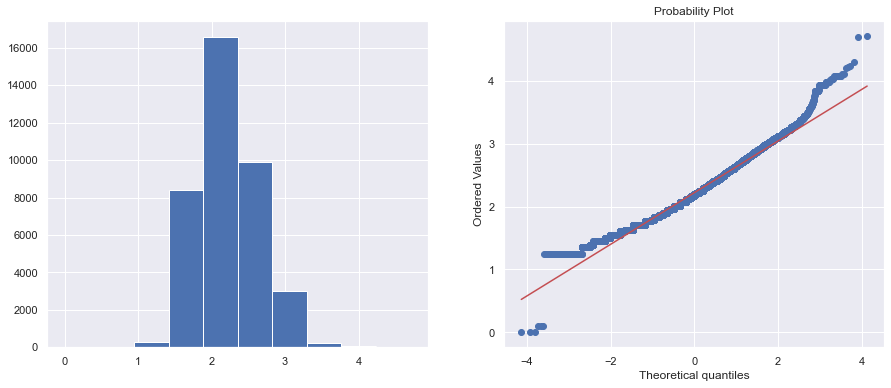

Plots without scaling for  longitude_of_pickup


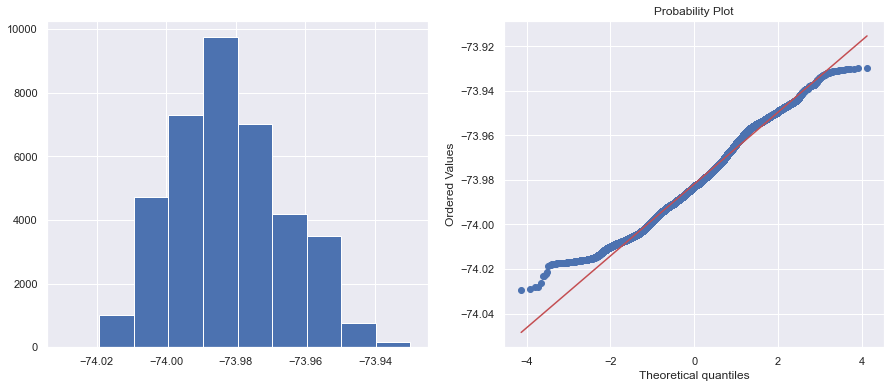

Plots without scaling for  latitude_of_pickup


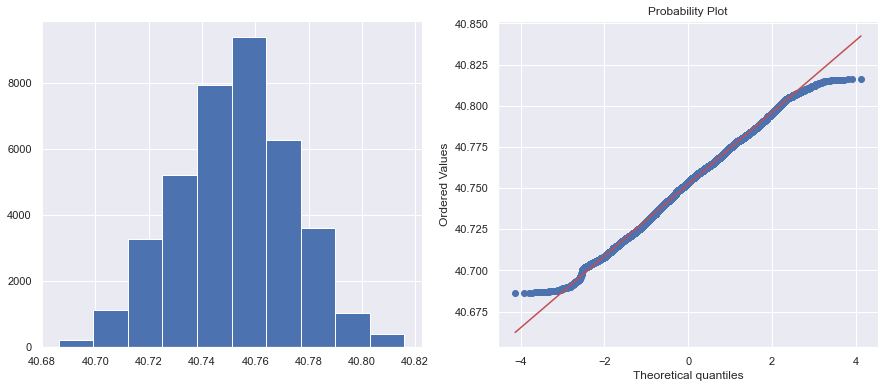

Plots without scaling for  longitude_of_dropoff


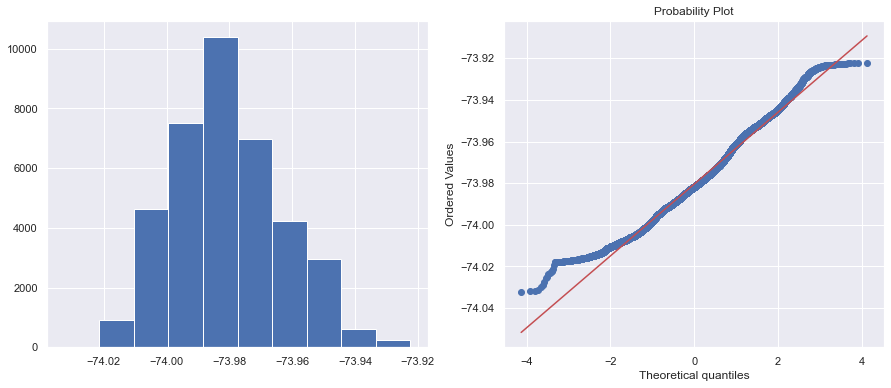

Plots without scaling for  latitude_of_dropoff


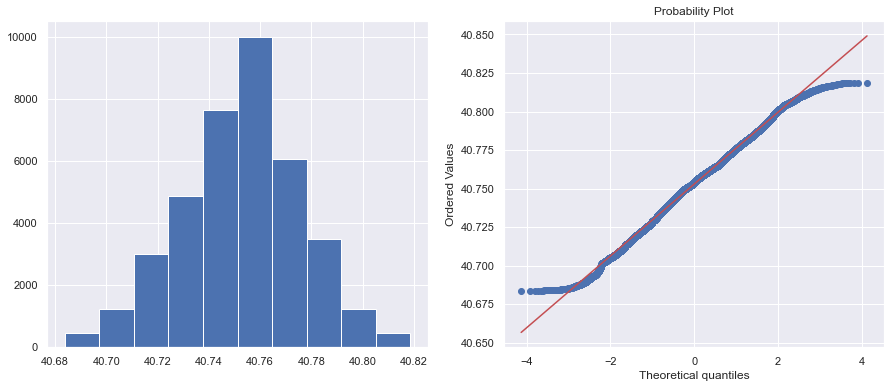

Plots without scaling for  no_of_passenger


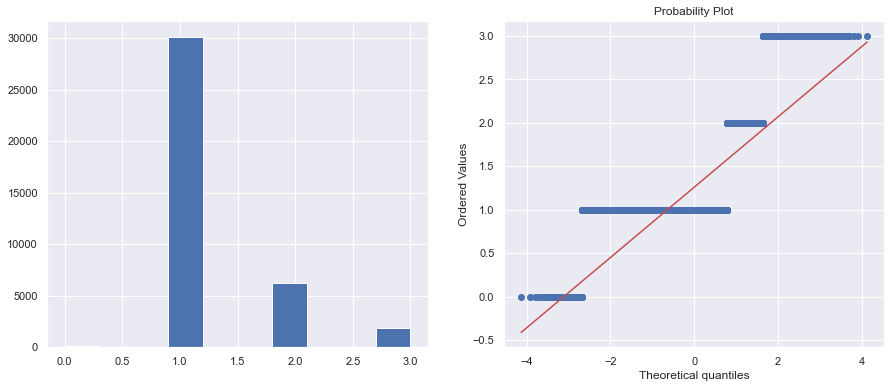

Plots without scaling for  Date


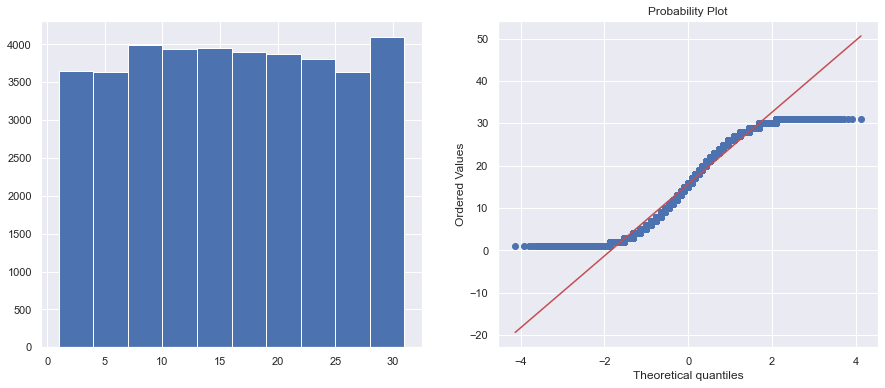

Plots without scaling for  Hour


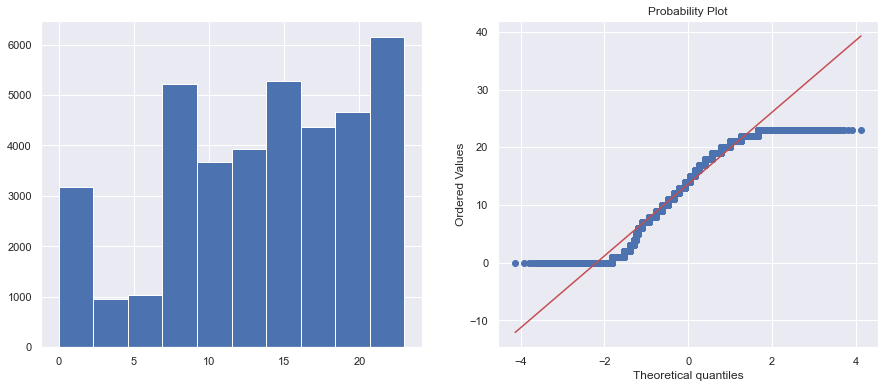

Plots without scaling for  Day


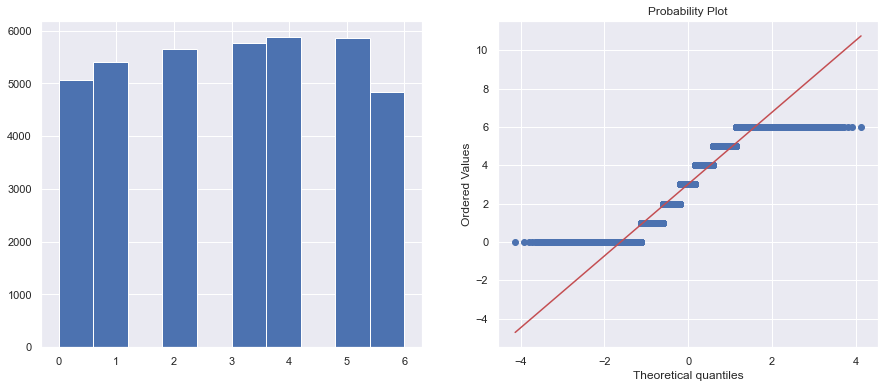

Plots without scaling for  Month


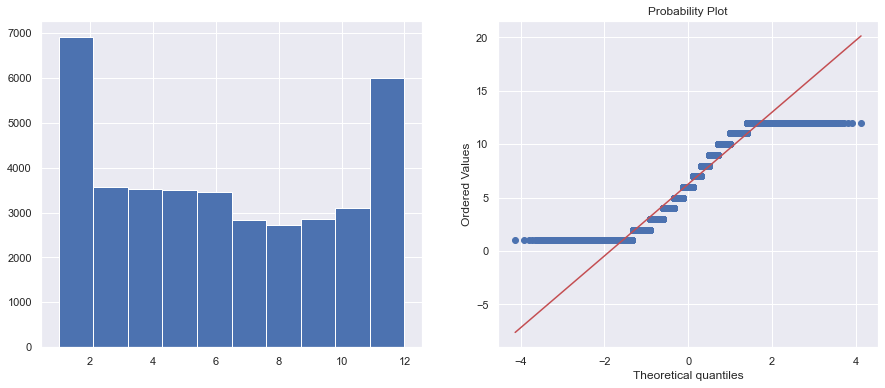

Plots without scaling for  Distance


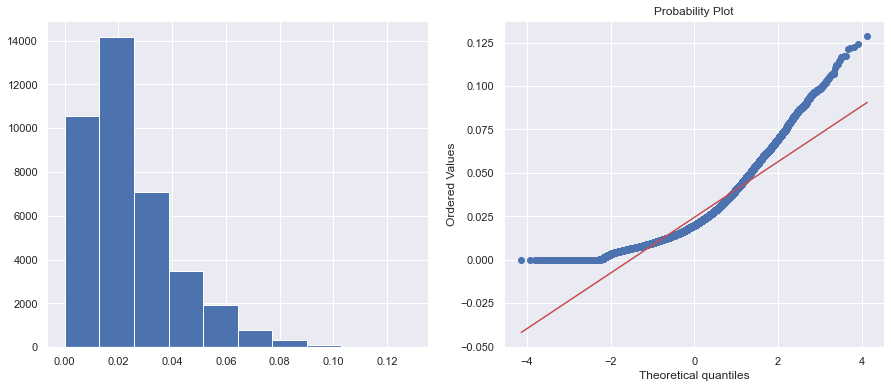

In [36]:
num_features=data.select_dtypes(include=['int', 'float'])
for feat in num_features.columns:
    print(f"Plots without scaling for ", feat)
    diagnostic_plots(data, feat)

### From above graphs
#### The plots for Distance, Hour, Day and Month are skewed
#### Plots of longitudes and latitudes are almost normally distributed

Plots after sqr-scaling for Distance


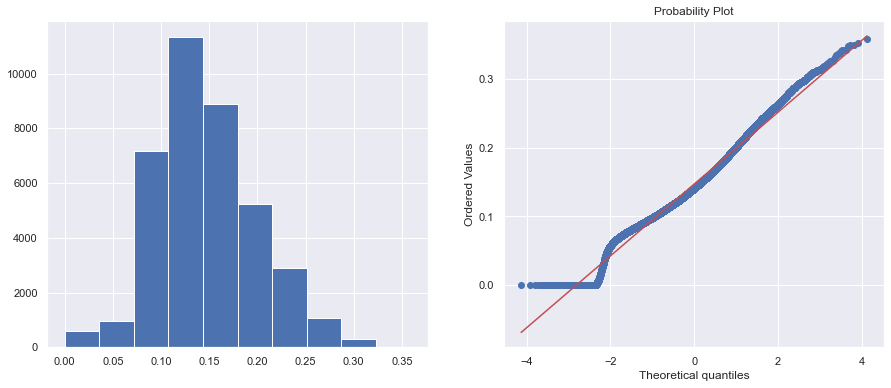

In [37]:
#Square-Root Transformation
print(f"Plots after sqr-scaling for Distance")
data['sqr_distance']=(data['Distance'])**(1/2)
diagnostic_plots(data, 'sqr_distance')
data.drop('Distance', axis=1, inplace=True)

## Data Splitting

In [38]:
X=data.drop(['amount'], axis=1)
y=data[['amount']]

In [39]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=1)

In [40]:
print("Feature importance by Random Forest:->\n")
RF = RandomForestRegressor()
RF.fit(X,y)
features = RF.feature_importances_
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
plt.figure(figsize=(16,5))
plt.title(label="RF")
plt.bar([x for x in range(len(features))],features)
plt.show()

print("Feature importance by Decision Tree:->\n")
DT = DecisionTreeRegressor()
DT.fit(X,y)
features = DT.feature_importances_
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
plt.figure(figsize=(16,5))
plt.title(label="DT")
plt.bar([x for x in range(len(features))],features)
plt.show()

print("Feature importance by Suppoprt Vector Machine:->\n")
SVM = SVR(kernel="linear")
SVM.fit(X,y)
features = SVM.coef_[0]
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
plt.figure(figsize=(16,5))
plt.bar([x for x in range(len(features))],features)
plt.show()

print("Feature importance by Logistic Regression:->\n")
LR = LinearRegression()
LR.fit(X,y)
features = LR.coef_[0]
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
plt.figure(figsize=(16,5))
plt.title(label="LOGC")
plt.bar([x for x in range(len(features))],features)
plt.show()

In [41]:
scaling= StandardScaler()

In [42]:
scaling.fit_transform(X)

array([[-2.10730418, -1.88468367,  0.06889288, ..., -1.03300343,
        -1.51542923,  2.56800619],
       [-0.05243158,  0.40634217, -0.62156311, ..., -0.00538127,
         0.50318207, -0.57099471],
       [-0.32337125, -0.88330267, -0.64030357, ...,  1.02224089,
        -0.6503101 ,  0.23100684],
       ...,
       [-1.28375122, -0.59513053, -1.01747683, ...,  1.53605197,
        -1.51542923, -0.06799725],
       [ 2.2100874 ,  1.1535723 ,  1.55763454, ..., -1.03300343,
         1.3683012 , -1.12650605],
       [ 3.0403645 ,  0.52257389,  2.75973376, ..., -0.51919235,
        -1.51542923, -2.79066193]])

## Model Building

In [43]:
lr= LinearRegression(n_jobs=20, fit_intercept=False )
lr.fit(X_train, y_train)

LinearRegression(fit_intercept=False, n_jobs=20)

In [44]:
lr.score(X_train, y_train)

0.6071703495556275

In [45]:
lr.score(X_test, y_test)

0.6000895126471967

In [54]:
dt=DecisionTreeRegressor(max_depth=6, min_samples_leaf=2, criterion= "squared_error", min_samples_split=3,max_features=10, max_leaf_nodes=50, )
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, max_features=10, max_leaf_nodes=50,
                      min_samples_leaf=2, min_samples_split=3)

In [55]:
dt.score(X_train, y_train)

0.6777093883771155

In [56]:
dt.score(X_test, y_test)

0.6454140921762503

In [57]:
bagging= BaggingRegressor(n_estimators=50, max_samples=0.2, max_features=0.9,verbose=4)
bagging.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 50 for this parallel run (total 50)...
Building estimator 2 of 50 for this parallel run (total 50)...
Building estimator 3 of 50 for this parallel run (total 50)...
Building estimator 4 of 50 for this parallel run (total 50)...
Building estimator 5 of 50 for this parallel run (total 50)...
Building estimator 6 of 50 for this parallel run (total 50)...
Building estimator 7 of 50 for this parallel run (total 50)...
Building estimator 8 of 50 for this parallel run (total 50)...
Building estimator 9 of 50 for this parallel run (total 50)...
Building estimator 10 of 50 for this parallel run (total 50)...
Building estimator 11 of 50 for this parallel run (total 50)...
Building estimator 12 of 50 for this parallel run (total 50)...
Building estimator 13 of 50 for this parallel run (total 50)...
Building estimator 14 of 50 for this parallel run (total 50)...
Building estimator 15 of 50 for this parallel run (total 50)...
Building estimator 16 of 50 for this parallel run

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s finished


BaggingRegressor(max_features=0.9, max_samples=0.2, n_estimators=50, verbose=4)

In [58]:
bagging.score(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


0.7891682981725604

In [59]:
bagging.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


0.6726875454695185

In [61]:
ada=AdaBoostRegressor(n_estimators=2, learning_rate=2.0, loss='exponential',)
ada.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=2.0, loss='exponential', n_estimators=2)

In [62]:
ada.score(X_train, y_train)

0.6401505789558427

In [63]:
ada.score(X_test, y_test)

0.6182299989363272

In [65]:
grad=GradientBoostingRegressor(n_estimators=200, learning_rate=0.2, loss='huber')
grad.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.2, loss='huber', n_estimators=200)

In [66]:
grad.score(X_train, y_train)

0.7271631402156341

In [67]:
grad.score(X_test, y_test)

0.6861284884699161

In [68]:
rf=RandomForestRegressor(n_estimators=70,random_state=0,n_jobs=30,max_depth=7,bootstrap=True)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, n_estimators=70, n_jobs=30, random_state=0)

In [69]:
rf.score(X_train, y_train)

0.7042763155383955

In [70]:
rf.score(X_test, y_test)

0.6606728265003698

In [ ]:
svm= SVR(C=7.0, kernel='linear')
svm.fit(X_train, y_train)

In [ ]:
svm.score(X_train, y_train)

In [ ]:
svm.score(X_test, y_test)

In [ ]:
pred_svm=svm.predict(X_test)
cm=metrics.confusion_matrix(y_test, pred_svm, labels=[1,0])
df_cm=pd.DataFrame(cm, index=[i for i in ['1', '0']],
                  columns=[i for i in ['predict 1', 'predict 0']])
plt.figure(figsize=(7,5))
sn.heatmap(df_cm, annot=True, fmt='g')

In [ ]:
print(sklearn.metrics.classification_report(y_test,pred_svm))

#### Therefore, from the models we have figured out that the GradiantBoosting model gives best results for this dataset